# Sales Data Analysis

Assignment

1- Plot daily sales for all 50 weeks.

2- It looks like there has been a sudden change in daily sales. What date did it occur?

3- Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

4- Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

5- Assume a given day is divided into four dayparts:
    night (12:00AM - 6:00AM),
    morning (6:00AM - 12:00PM),
    afternoon (12:00PM - 6:00PM),
    evening (6:00PM - 12:00AM).
    What is the percentage of sales in each daypart over all 50 weeks?
    
# Data eploration


In [95]:
#Import libraries/dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [96]:
# Read multiple files
# Define the path to your CSV files
path = "C:/Users/tangu/OneDrive/Documents/2- Perso/CODING/PROJECT - PORTFOLIO/Sales Data Analysis - 23AndMe/datasets/*.csv"
# Use glob to get a list of file paths
csv_files = glob.glob(path)
# Loop through the files and read them into Pandas DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]
# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
# Display the combined DataFrame
combined_df.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [97]:
combined_df.describe()

,sale_time,purchaser_gender
count,204329,204329
unique,203411,2
top,2013-06-12 12:26:28,female
freq,3,107740


In [98]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [99]:
#Convert date column to datetime data type for easier analysis
combined_df['sale_time'] = pd.to_datetime(combined_df['sale_time'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  datetime64[ns]
 1   purchaser_gender  204329 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ MB


The exploration is now finished. We do not have null data, and the type of each data is what it should be. We can start asnwering the project question.

# Question 1 : Plot daily sales for all 50 weeks.

We need to group the data by day and sum of sales for each day

In [137]:
# Group by day
combined_df['day'] = combined_df['sale_time'].dt.date  # Extract only the date part
daily_sales = combined_df.groupby('day')['purchaser_gender'].count().reset_index(name='sales_amount')  # Aggregate values, e.g., sum and keep it as a df with reset.index
daily_sales['day'] = pd.to_datetime(daily_sales['day'])
daily_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   day           350 non-null    datetime64[ns]
 1   sales_amount  350 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


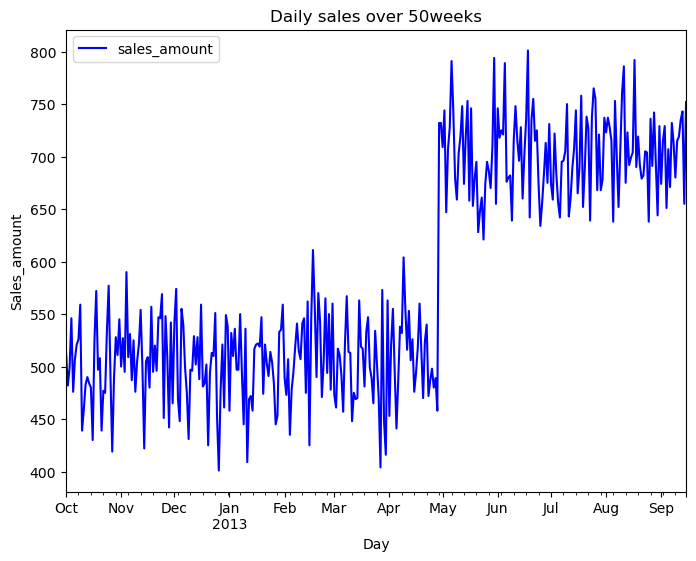

In [101]:
#  to use index in plotting make sale_day index
daily_sales.index = daily_sales['day']
daily_sales.drop(columns=['day'], inplace=True)

# Plot the grouped data
daily_sales.plot(figsize=(8,6), title='Daily sales over 50weeks', xlabel='Day', ylabel='Sales_amount', color='blue')
plt.show()

# Question 2 : It looks like there has been a sudden change in daily sales. What date did it occur?

In [102]:
# Calculate the difference in 'Sales_amount' (the change between consecutive days)
daily_sales['change'] = daily_sales['sales_amount'].diff()

In [103]:
# Find the day with the maximum increase
max_increase_day = daily_sales[daily_sales['change'] == daily_sales['change'].max()]
print(max_increase_day)

            sales_amount  change
day                             
2013-04-29           732   274.0


# Question 3 : Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

To determine if the change in daily sales at the selected date is statistically significant, you would typically use a hypothesis test. A common approach is to apply a t-test to compare the daily sales before and after the selected day (i.e., a before-after comparison or a paired t-test). This test evaluates whether the difference in means between the two periods is statistically significant.

Define the hypothesis

Perform the t-test

Calculate the p-value: The p-value will help you determine if the change is statistically significant (usually, if p < 0.05, the result is considered statistically significant).


In [104]:
from scipy import stats

In [105]:
# Identify the date with the maximum increase
#selected_date = max_increase_day.index[0]

# Split the data into two groups: before and after the selected date
#before_change = daily_sales[daily_sales.index < selected_date]['sales_amount']
#after_change = daily_sales[daily_sales.index > selected_date]['sales_amount']

# Perform an independent two-sample t-test
#t_stat, p_value = stats.ttest_ind(before_change, after_change)

# Print the results
#print(f"T-statistic: {t_stat}")
#print(f"P-value: {p_value}")

# first drop all nan values (if any) for the test 
daily_sales.dropna(inplace=True)
stats.ttest_1samp(daily_sales['sales_amount'], 732)

TtestResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84, df=348)

Statistical significance is decided by a t-test in statistics. If you want to learn more about different kinds of statistical analysis and each of their use cases, you can read more here. Scipy, a library that implements several scientific concepts in Python, includes a stats module to apply t-test. We want to understand the importance of a specific sample, so we'll use _ttestlsamp( ) function.

The obtained p-value as the result of the t-test is 1.3019593251472396e-84 which is lower than 0.05 (we can assume the threshold as 0.05 as common practice). It leads to decide this particular date is important for us.

# QUESTION 4

Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

This question implies a dramatic change might have happened in male-vs-female customers at the date of sudden change. We can observe whether this assumption is valid or not by plotting sales amounts with gender portions over 50 weeks. We will aggregate our initial dataset, which includes the purchaser_gender column, first by sale_day then purchaser_gender. It returns us daily sales amount by gender.

In [113]:
daily_sales_gender = combined_df.groupby(['day','purchaser_gender'])['purchaser_gender'].count().unstack(fill_value=0).reset_index()  # Aggregate values, e.g., sum and keep it as a df with reset.index
#daily_sales_gender = combined_df.groupby(['day','purchaser_gender'])['purchaser_gender'].count().reset_index(name='sales_amount')  # Aggregate values, e.g., sum and keep it as a df with reset.index
daily_sales_gender['day'] = pd.to_datetime(daily_sales_gender['day'])

# Renommer les colonnes et l'index
daily_sales_gender.columns.name = None 
daily_sales_gender = daily_sales_gender.rename(columns={'male': 'sales_male', 'female': 'sales_female'})

daily_sales_gender

,day,sales_female,sales_male
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


In [114]:
# calculate gender ratio of sales
daily_sales_gender['gender_ratio'] = daily_sales_gender['sales_male']/daily_sales_gender['sales_female']
daily_sales_gender.head()

,day,sales_female,sales_male,gender_ratio
0,2012-10-01,413,101,0.244552
1,2012-10-02,379,103,0.271768
2,2012-10-03,386,113,0.292746
3,2012-10-04,432,114,0.263889
4,2012-10-05,368,108,0.293478


In [127]:
# create a new column for the total sales
ratio_gender = daily_sales_gender.copy()
ratio_gender['total_sales'] = ratio_gender['sales_male']+ratio_gender['sales_female']
ratio_gender.drop(columns=['sales_male','sales_female'], inplace=True)
ratio_gender

,day,gender_ratio,total_sales
0,2012-10-01,0.244552,514
1,2012-10-02,0.271768,482
2,2012-10-03,0.292746,499
3,2012-10-04,0.263889,546
4,2012-10-05,0.293478,476
...,...,...,...
345,2013-09-11,2.209821,719
346,2013-09-12,2.266667,735
347,2013-09-13,2.606796,743
348,2013-09-14,2.393782,655


In [128]:
# to use index in plotting make day index
ratio_gender.index = ratio_gender['day']
ratio_gender.drop(columns=['day'], inplace=True)

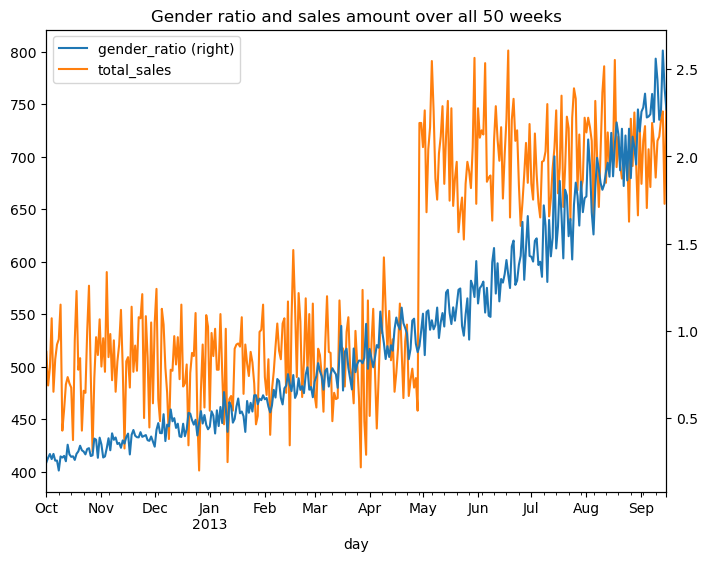

In [130]:
# Plot the grouped data
ratio_gender.plot(secondary_y = ['gender_ratio'],figsize=(8,6), title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

The increasing trend of the male ratio in the sales amount does not explain the sudden change. The reason should be something different. For example, it might be caused by starting a new marketing campaign or adding a new feature to the website.

# QUESTION 5 : 
Assume a given day is divided into four dayparts:
night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).
What is the percentage of sales in each daypart over all 50 weeks?

In [139]:
combined_df.drop(columns=['day'], inplace=True)

In [141]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  datetime64[ns]
 1   purchaser_gender  204329 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ MB


In [148]:
# Define a function to categorize the time into dayparts
def get_daypart(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
    
# Extract the hour from the timestamp and categorize the daypart
combined_df['hour'] = combined_df['sale_time'].dt.ceil('h').dt.hour
combined_df['daypart'] = combined_df['hour'].apply(get_daypart)

combined_df

,sale_time,purchaser_gender,hour,daypart
0,2012-10-01 01:42:22,female,2,Night
1,2012-10-01 02:24:53,female,3,Night
2,2012-10-01 02:25:40,female,3,Night
3,2012-10-01 02:30:42,female,3,Night
4,2012-10-01 02:51:32,male,3,Night
...,...,...,...,...
204324,2013-09-15 23:30:51,female,0,Night
204325,2013-09-15 23:42:02,female,0,Night
204326,2013-09-15 23:43:24,male,0,Night
204327,2013-09-15 23:43:32,male,0,Night


In [149]:
# Group by daypart and sum the sales amounts for each daypart
sales_by_daypart = combined_df.groupby('daypart')['purchaser_gender'].count()

In [150]:
# Calculate the total sales across all dayparts
total_sales = sales_by_daypart.sum()

# Calculate the percentage of sales in each daypart
sales_percentage = (sales_by_daypart / total_sales) * 100

# Print the results
print("Sales by daypart:")
print(sales_by_daypart)
print("\nSales percentage by daypart:")
print(sales_percentage)

Sales by daypart:
daypart
Afternoon    81159
Evening      53523
Morning      56080
Night        13567
Name: purchaser_gender, dtype: int64

Sales percentage by daypart:
daypart
Afternoon    39.719766
Evening      26.194520
Morning      27.445933
Night         6.639782
Name: purchaser_gender, dtype: float64
